<a href="https://colab.research.google.com/github/sanchitjain04/EIP-session-1/blob/master/Session1Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Import Libraries and modules**

In [1]:
# https://keras.io/
!pip install -q keras
import keras
import tensorflow as tf


Using TensorFlow backend.


In [0]:
import numpy as np

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Add
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils

from keras.datasets import mnist

### Load pre-shuffled MNIST data into train and test sets

In [3]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


(60000, 28, 28)


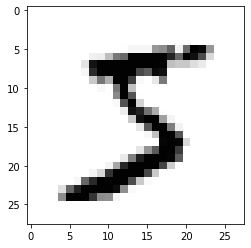

In [4]:
print (X_train.shape)
from matplotlib import pyplot as plt
%matplotlib inline

plt.imshow(X_train[0], cmap='Greys')


In [0]:
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)

In [0]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [7]:
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [0]:
# Convert 1-dimensional class arrays to 10-dimensional class matrices
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

In [0]:
Y_train[:10]


In [0]:
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D
# Creating a Sequential Model and adding the layers


In [0]:
from keras.layers import Activation
model = Sequential()


model.add(keras.layers.Conv2D(32, (3, 3), activation = 'relu', input_shape = (28, 28, 1)))
model.add(keras.layers.MaxPooling2D(2, 2))

model.add(keras.layers.Conv2D(64, (3, 3), activation = 'relu'))
model.add(keras.layers.MaxPooling2D(2, 2))

model.add(keras.layers.Conv2D(64, (3, 3), activation = 'relu'))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(128, activation = 'relu'))

model.add(keras.layers.Dense(10, activation = 'softmax'))




In [86]:
model.summary()

Model: "sequential_18"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_47 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_48 (Conv2D)           (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_49 (Conv2D)           (None, 3, 3, 64)          36928     
_________________________________________________________________
flatten_16 (Flatten)         (None, 576)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 128)             

In [0]:
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [88]:
model.fit(X_train, Y_train, batch_size=32, nb_epoch=20, verbose=1)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.


Epoch 1/20
60000/60000 [==============================] - 60s 997us/step - loss: 0.1373 - acc: 0.9570
Epoch 2/20
60000/60000 [==============================] - 58s 973us/step - loss: 0.0454 - acc: 0.9861
Epoch 3/20
60000/60000 [==============================] - 59s 978us/step - loss: 0.0332 - acc: 0.9895
Epoch 4/20
60000/60000 [==============================] - 58s 973us/step - loss: 0.0246 - acc: 0.9924
Epoch 5/20
60000/60000 [==============================] - 58s 959us/step - loss: 0.0205 - acc: 0.9933
Epoch 6/20
60000/60000 [==============================] - 58s 960us/step - loss: 0.0170 - acc: 0.9946
Epoch 7/20
60000/60000 [==============================] - 58s 962us/step - loss: 0.0137 - acc: 0.9960
Epoch 8/20
60000/60000 [==============================] - 58s 961us/step - loss: 0.0127 - acc: 0.9958
Epoch 9/20
60000/60000 [==============================] - 58s 962us/step - loss: 0.0106 - acc: 0.9966
Epoch 10/20
60000/60000 [==============================] - 58s 961us/step - loss: 

In [0]:
score = model.evaluate(X_test, Y_test, verbose=0)

In [90]:
print(score)

[0.04807635619162229, 0.9919]


In [0]:
y_pred = model.predict(X_test)

In [92]:
print(y_pred[:9])
print(y_test[:9])

[[2.32021330e-16 1.26278827e-15 5.46505874e-13 1.00315654e-14
  8.27586019e-14 2.60110541e-15 8.04413500e-20 1.00000000e+00
  8.88297519e-13 1.06636122e-09]
 [3.95823155e-15 1.26280254e-23 1.00000000e+00 8.31511286e-26
  1.22176115e-25 2.42006051e-31 1.85864313e-22 6.63096045e-24
  2.47460807e-23 3.82140236e-24]
 [4.05457426e-14 1.00000000e+00 5.46404773e-13 1.81046146e-16
  2.59698350e-13 4.89239260e-10 1.39266194e-11 1.06753443e-11
  2.85128916e-08 3.83549648e-16]
 [1.00000000e+00 9.85814663e-18 1.00526962e-17 6.04123709e-19
  3.66277188e-18 5.95450307e-18 7.04558211e-14 3.08740898e-20
  2.75307028e-18 5.56788556e-13]
 [8.77829411e-17 2.60254058e-14 7.29646764e-19 8.15998983e-23
  9.99999881e-01 1.35237810e-15 9.61165216e-14 1.25725034e-16
  3.16486733e-11 1.11955835e-07]
 [1.65476797e-14 1.00000000e+00 9.26311165e-15 1.39248711e-18
  4.71889780e-14 1.50454336e-11 6.05013137e-14 5.89426508e-10
  3.27306671e-09 2.75080567e-16]
 [1.52747831e-23 3.15991795e-17 2.71181854e-23 2.69433686e

In [0]:
layer_dict = dict([(layer.name, layer) for layer in model.layers])

In [0]:
import numpy as np
from matplotlib import pyplot as plt
from keras import backend as K
%matplotlib inline
# util function to convert a tensor into a valid image
def deprocess_image(x):
    # normalize tensor: center on 0., ensure std is 0.1
    x -= x.mean()
    x /= (x.std() + 1e-5)
    x *= 0.1

    # clip to [0, 1]
    x += 0.5
    x = np.clip(x, 0, 1)

    # convert to RGB array
    x *= 255
    #x = x.transpose((1, 2, 0))
    x = np.clip(x, 0, 255).astype('uint8')
    return x

def vis_img_in_filter(img = np.array(X_train[2]).reshape((1, 28, 28, 1)).astype(np.float64), 
                      layer_name = 'conv2d_14'):
    layer_output = layer_dict[layer_name].output
    img_ascs = list()
    for filter_index in range(layer_output.shape[3]):
        # build a loss function that maximizes the activation
        # of the nth filter of the layer considered
        loss = K.mean(layer_output[:, :, :, filter_index])

        # compute the gradient of the input picture wrt this loss
        grads = K.gradients(loss, model.input)[0]

        # normalization trick: we normalize the gradient
        grads /= (K.sqrt(K.mean(K.square(grads))) + 1e-5)

        # this function returns the loss and grads given the input picture
        iterate = K.function([model.input], [loss, grads])

        # step size for gradient ascent
        step = 5.

        img_asc = np.array(img)
        # run gradient ascent for 20 steps
        for i in range(20):
            loss_value, grads_value = iterate([img_asc])
            img_asc += grads_value * step

        img_asc = img_asc[0]
        img_ascs.append(deprocess_image(img_asc).reshape((28, 28)))
        
    if layer_output.shape[3] >= 35:
        plot_x, plot_y = 6, 6
    elif layer_output.shape[3] >= 23:
        plot_x, plot_y = 4, 6
    elif layer_output.shape[3] >= 11:
        plot_x, plot_y = 2, 6
    else:
        plot_x, plot_y = 1, 2
    fig, ax = plt.subplots(plot_x, plot_y, figsize = (12, 12))
    ax[0, 0].imshow(img.reshape((28, 28)), cmap = 'gray')
    ax[0, 0].set_title('Input image')
    fig.suptitle('Input image and %s filters' % (layer_name,))
    fig.tight_layout(pad = 0.3, rect = [0, 0, 0.9, 0.9])
    for (x, y) in [(i, j) for i in range(plot_x) for j in range(plot_y)]:
        if x == 0 and y == 0:
            continue
        ax[x, y].imshow(img_ascs[x * plot_y + y - 1], cmap = 'gray')
        ax[x, y].set_title('filter %d' % (x * plot_y + y - 1))

vis_img_in_filter()